In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#load dataset
data = pd.read_csv("listings_new_york_2024.csv")

data.sample(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
150,103555,Clean&Serene in Scenic Fort Greene,220001,Gordon,Brooklyn,Fort Greene,40.693047,-73.971985,Entire home/apt,325.0,30,286,2023-09-04,1.78,1,0,4,NaN


In [61]:
#identify number of rows and columns
rows, columns = data.shape
print("rows = ", rows)
print("columns = ", columns)

rows =  37765
columns =  18


In [62]:
#display columns data types
data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

In [63]:
#summary statistics
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,3.776500e+04,3.776500e+04,37765.000000,37765.000000,23044.000000,37765.000000,37765.000000,26014.000000,37765.000000,37765.000000,37765.000000
mean,3.653038e+17,1.659684e+08,40.729075,-73.947084,221.074900,29.164597,24.898981,0.905544,53.763035,152.411598,3.993168
std,4.539908e+17,1.800529e+08,0.056343,0.054458,766.620992,30.202538,58.802122,1.860784,161.979723,142.797333,15.762591
min,2.595000e+03,1.678000e+03,40.500366,-74.251907,8.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.055254e+07,1.662776e+07,40.688800,-73.983220,86.000000,30.000000,0.000000,0.090000,1.000000,0.000000,0.000000
50%,4.826382e+07,8.218953e+07,40.726440,-73.954540,150.000000,30.000000,3.000000,0.320000,2.000000,126.000000,0.000000
75%,8.276380e+17,3.031569e+08,40.762470,-73.928022,250.000000,30.000000,21.000000,1.130000,8.000000,301.000000,3.000000
max,1.193086e+18,5.869174e+08,40.911390,-73.713650,100000.000000,1250.000000,1915.000000,103.530000,842.000000,365.000000,1568.000000


In [64]:
#Count unique values, find the first and second mode and their frequency
categorical_columns = data.select_dtypes(include=['object', 'category'])

for col in categorical_columns:
    print("Column:", col)

    unique_values = data[col].nunique()
    print("Count unique values:",unique_values)

    modes = data[col].mode()
    mode_count = data[col].value_counts()
    
    #check if there are at least 2 modes
    if len(modes) > 1:
        mode1 = modes[0]
        mode2 = modes[1]
    else:
        mode1 = modes[0]
        mode2 = None
    
    mode1_frequency = mode_count.get(mode1,0)
    mode2_frequency = mode_count.get(mode2, 0)

    print("First Mode:", mode1)
    print("First Mode Frequency:", mode1_frequency)

    print("Second Mode:",mode2)
    print("Second Mode Frequency:", mode2_frequency)

    print()

Column: name
Count unique values: 36050
First Mode: Water View King Bed Hotel Room
First Mode Frequency: 30
Second Mode: None
Second Mode Frequency: 0

Column: host_name
Count unique values: 8534
First Mode: Blueground
First Mode Frequency: 842
Second Mode: None
Second Mode Frequency: 0

Column: neighbourhood_group
Count unique values: 5
First Mode: Manhattan
First Mode Frequency: 16715
Second Mode: None
Second Mode Frequency: 0

Column: neighbourhood
Count unique values: 225
First Mode: Bedford-Stuyvesant
First Mode Frequency: 2709
Second Mode: None
Second Mode Frequency: 0

Column: room_type
Count unique values: 4
First Mode: Entire home/apt
First Mode Frequency: 20023
Second Mode: None
Second Mode Frequency: 0

Column: last_review
Count unique values: 3059
First Mode: 2024-07-01
First Mode Frequency: 341
Second Mode: None
Second Mode Frequency: 0

Column: license
Count unique values: 1732
First Mode: Exempt
First Mode Frequency: 2872
Second Mode: None
Second Mode Frequency: 0



In [65]:
#Missing data with percentages
missing_data = data.isnull().sum()
missing_percentage = (missing_data /data.shape[0]) * 100

missing_df = pd.DataFrame({
    'Missing Data' : missing_data,
    'Missing Percentage' : missing_percentage},
    index= data.columns
)
print(missing_df)

                                Missing Data  Missing Percentage
id                                         0            0.000000
name                                       2            0.005296
host_id                                    0            0.000000
host_name                                  5            0.013240
neighbourhood_group                        0            0.000000
neighbourhood                              0            0.000000
latitude                                   0            0.000000
longitude                                  0            0.000000
room_type                                  0            0.000000
price                                  14721           38.980538
minimum_nights                             0            0.000000
number_of_reviews                          0            0.000000
last_review                            11751           31.116113
reviews_per_month                      11751           31.116113
calculated_host_listings_

In [66]:
#Detects potential outliers
columns_to_check = data.select_dtypes(include=['float64', 'int64']).columns.difference(['id', 'host_id'])

def count_outliers_pandas(data, column):
	Q1 = data[column].quantile(0.25)
	Q3 = data[column].quantile(0.75)
	IQR = Q3 - Q1
	lower_bound = Q1 - 1.5 * IQR
	upper_bound = Q3 + 1.5 * IQR
	outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
	return outliers.shape[0]

outliers_counts= {}

for col in columns_to_check:
	outliers_counts[col] = count_outliers_pandas(data, col)

for col, count in outliers_counts.items():
	print("Potential outliers in",col,":",count)

Potential outliers in availability_365 : 0
Potential outliers in calculated_host_listings_count : 7104
Potential outliers in latitude : 410
Potential outliers in longitude : 2601
Potential outliers in minimum_nights : 7317
Potential outliers in number_of_reviews : 5072
Potential outliers in number_of_reviews_ltm : 5321
Potential outliers in price : 1437
Potential outliers in reviews_per_month : 2188


In [67]:
#removes outliers from dataset using boolean mask
data = data.replace(r'[^a-zA-Z0-9\s]', '', regex=True) #replace special characters from df
columns_to_check = data.select_dtypes(include=['float64', 'int64']).columns.difference(['id', 'host_id'])

def find_outliers_pandas(data, column):
	Q1 = data[column].quantile(0.25)
	Q3 = data[column].quantile(0.75)
	IQR = Q3 - Q1
	lower_bound = Q1 - 1.5 * IQR
	upper_bound = Q3 + 1.5 * IQR
	outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
	return outliers

mask = pd.Series(True, index = data.index)

for col in columns_to_check:
	outliers = find_outliers_pandas(data,col)
	mask &= ~data.index.isin(outliers.index)

data_cleaned = data[mask]
rows, columns = data.shape
rows1, columns1 = data_cleaned.shape

print("data rows:",rows, ",columns:",columns)
print("new data rows:",rows1,",columns:",columns1)


data rows: 37765 ,columns: 18
new data rows: 18743 ,columns: 18


In [68]:
#remove columns where percentage higher than 50%
missing_data= data_cleaned.isnull().sum()
missing_percentage = (missing_data /data_cleaned.shape[0]) * 100

columns_to_keep = missing_percentage <=50

data_cleaned_filtered = data_cleaned.loc[:, columns_to_keep]

missing_data= data_cleaned_filtered.isnull().sum()
missing_percentage = (missing_data /data_cleaned_filtered.shape[0]) * 100
print(missing_percentage)

id                                 0.000000
name                               0.005335
host_id                            0.000000
host_name                          0.026677
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       31.494425
reviews_per_month                 31.494425
calculated_host_listings_count     0.000000
availability_365                   0.000000
number_of_reviews_ltm              0.000000
dtype: float64


In [69]:
#imputing missing values using mean/median or mode
data_cleaned_filtered['name'].fillna(data_cleaned_filtered['name'].mode()[0],inplace=True)
data_cleaned_filtered['host_name'].fillna('unknown',inplace=True)

data_cleaned_filtered['last_review'].fillna(data_cleaned_filtered['last_review'].mode()[0],inplace=True)
data_cleaned_filtered['reviews_per_month'].fillna(data_cleaned_filtered['reviews_per_month'].median(),inplace=True)

missing_data= data_cleaned_filtered.isnull().sum()
missing_percentage = (missing_data /data_cleaned_filtered.shape[0]) * 100
print(missing_percentage)

id                                0.0
name                              0.0
host_id                           0.0
host_name                         0.0
neighbourhood_group               0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
minimum_nights                    0.0
number_of_reviews                 0.0
last_review                       0.0
reviews_per_month                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
number_of_reviews_ltm             0.0
dtype: float64


C:\Users\keiim\AppData\Local\Temp\ipykernel_28020\294479905.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned_filtered['name'].fillna(data_cleaned_filtered['name'].mode()[0],inplace=True)
C:\Users\keiim\AppData\Local\Temp\ipykernel_28020\294479905.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned_filtered['name'].

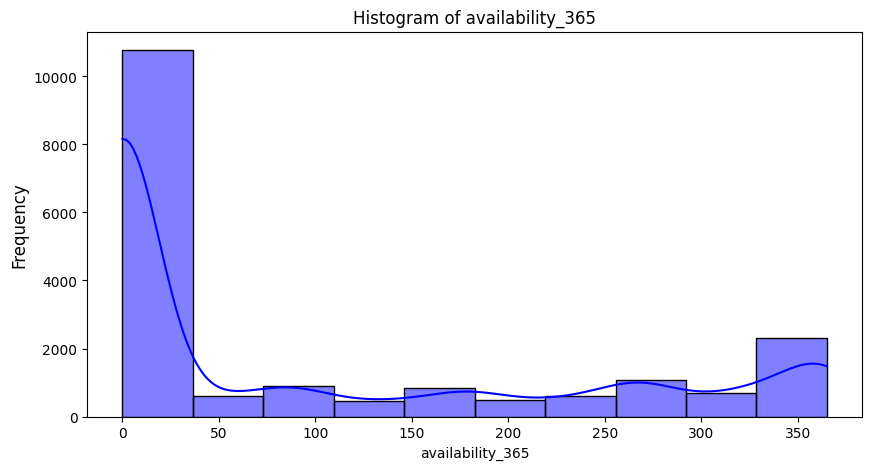

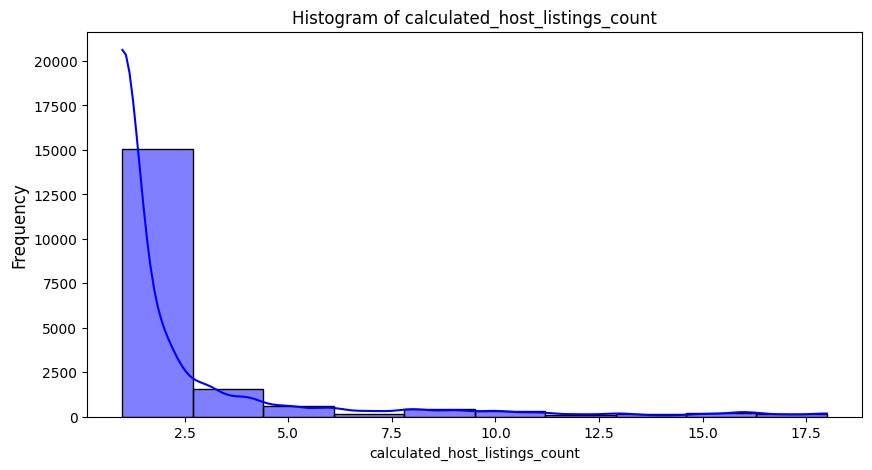

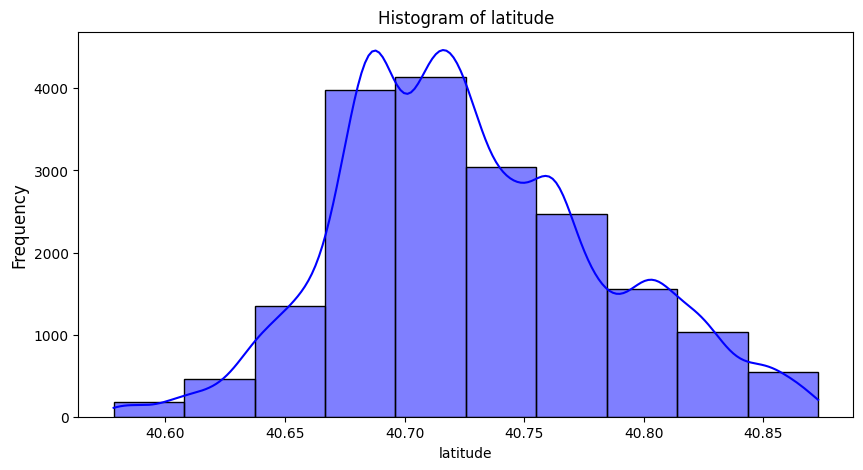

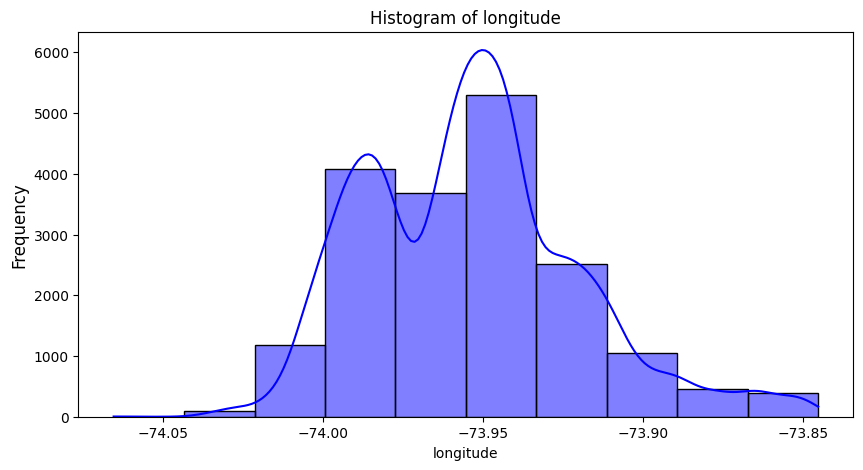

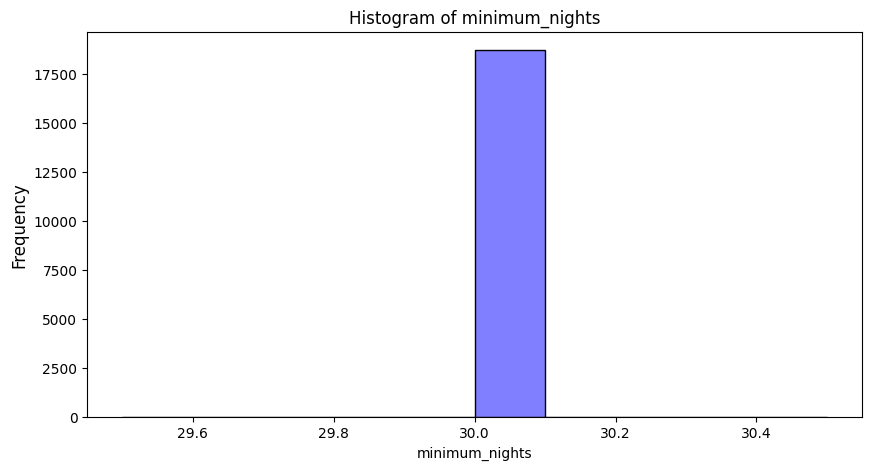

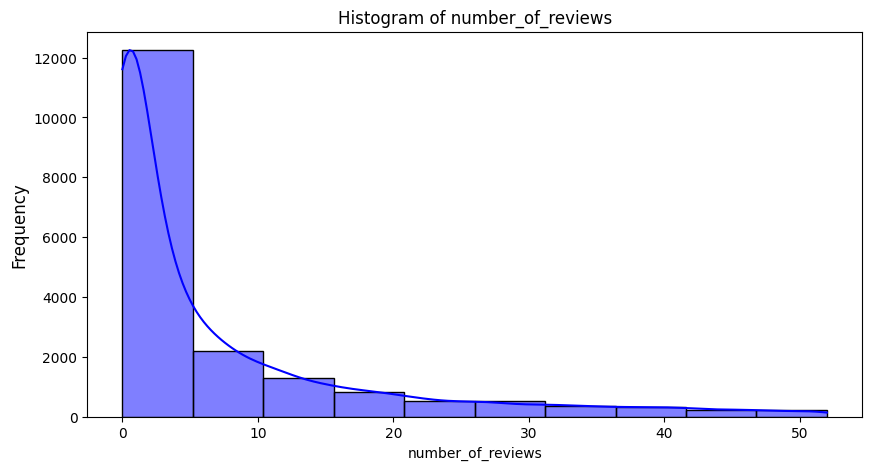

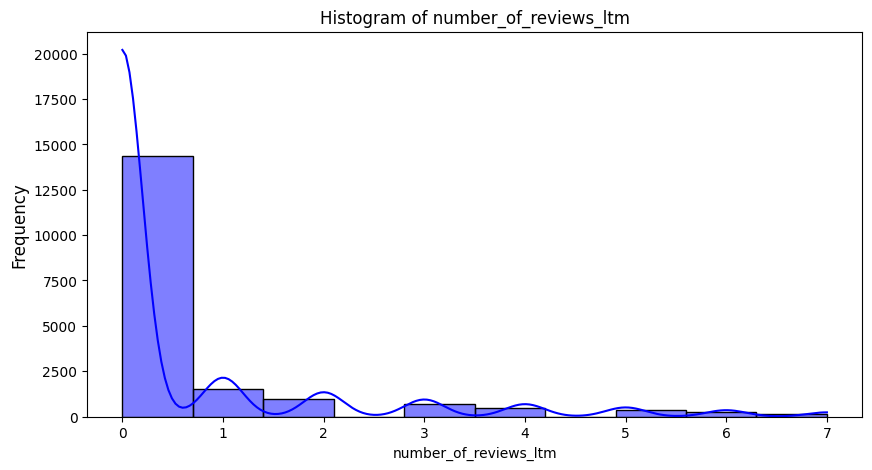

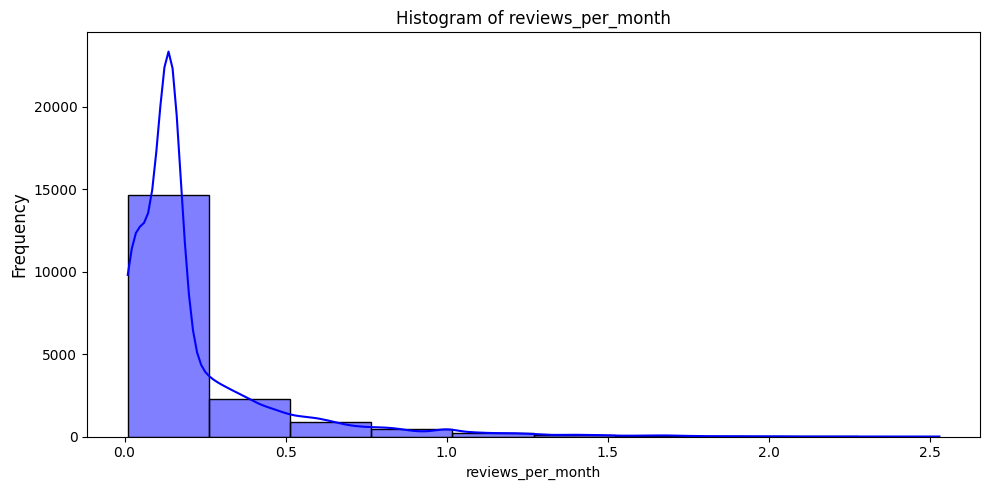

In [70]:
#Histogram for numerical columns 
numerical_cols = data_cleaned_filtered.select_dtypes(include=['float64','int64']).columns.difference(['id', 'host_id'])

for i,col in enumerate(numerical_cols):
    plt.figure(figsize=(10,5))
    sns.histplot(data_cleaned_filtered[col],kde=True,bins=10, color='blue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency', fontsize=12)

plt.tight_layout() 

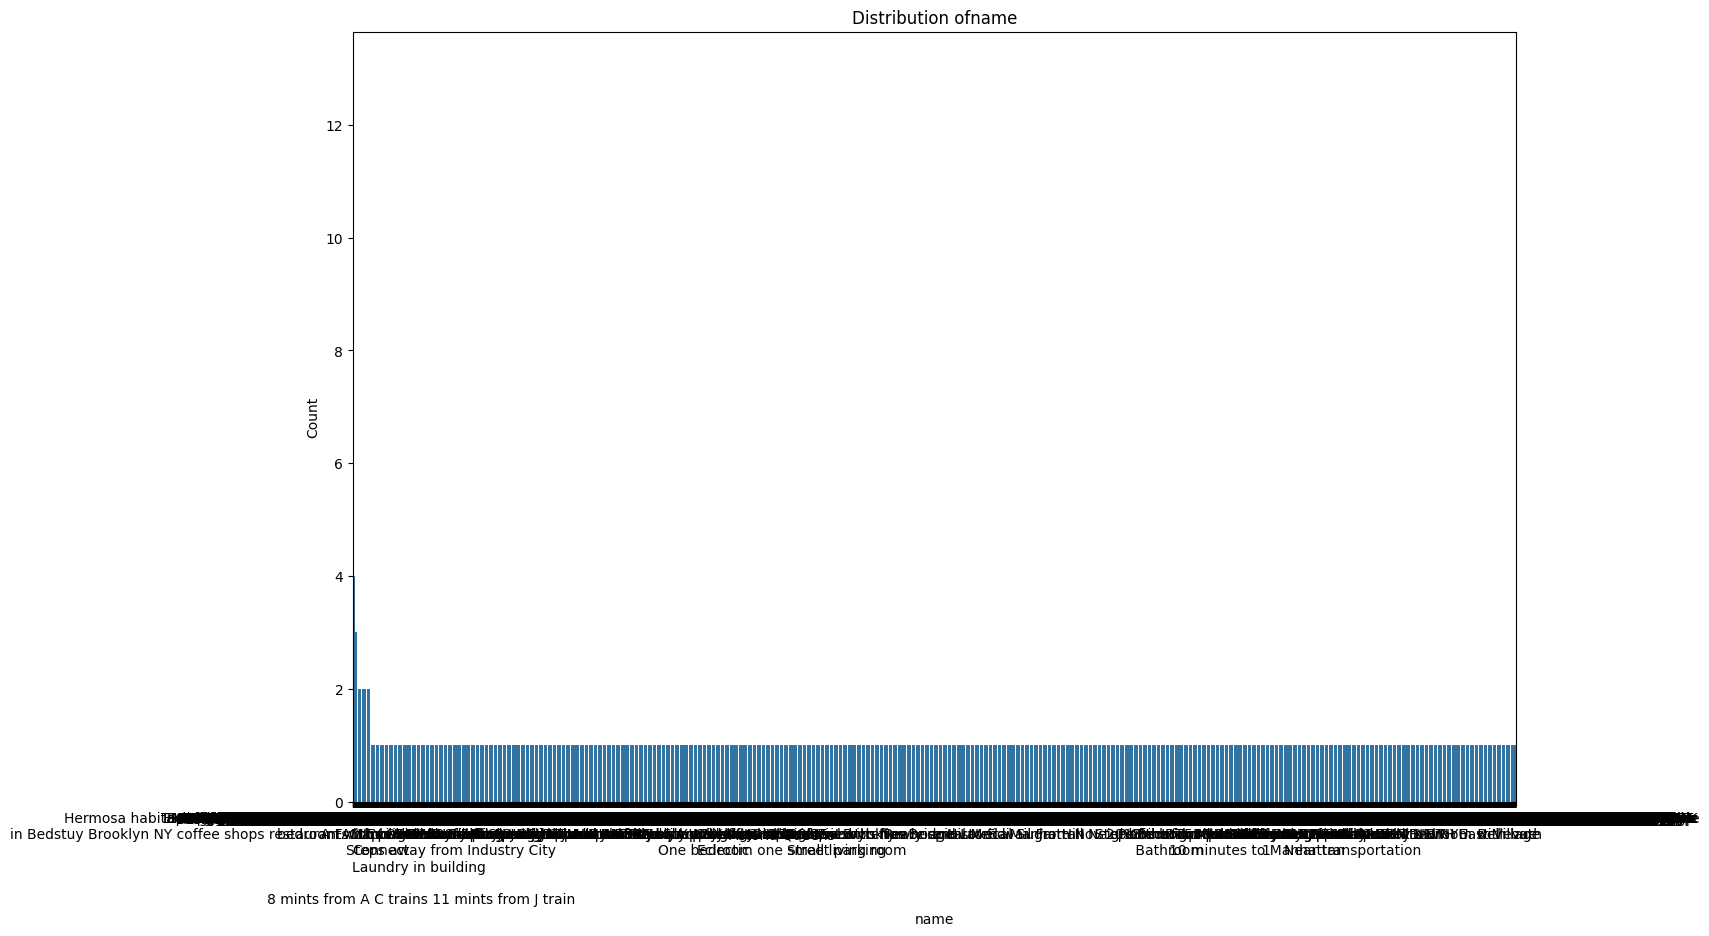

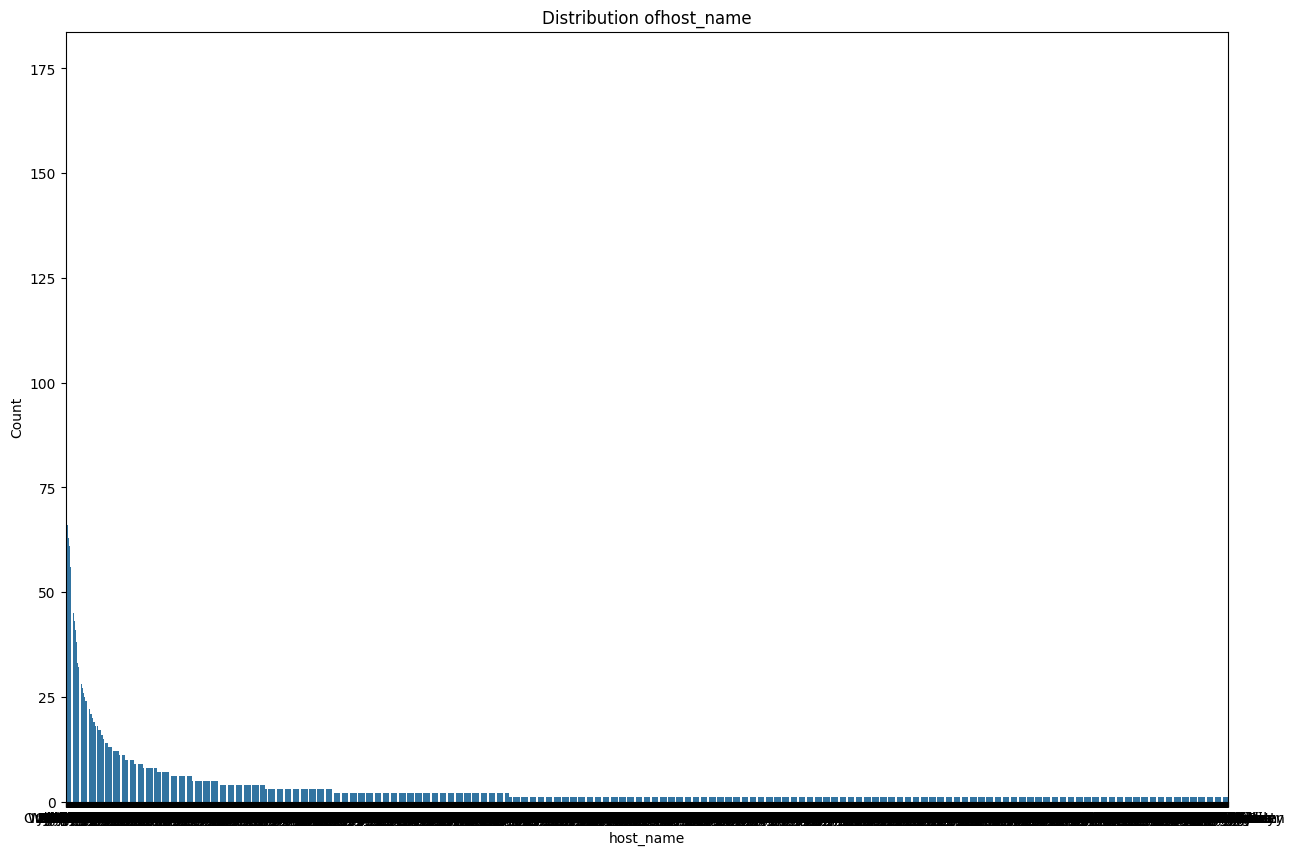

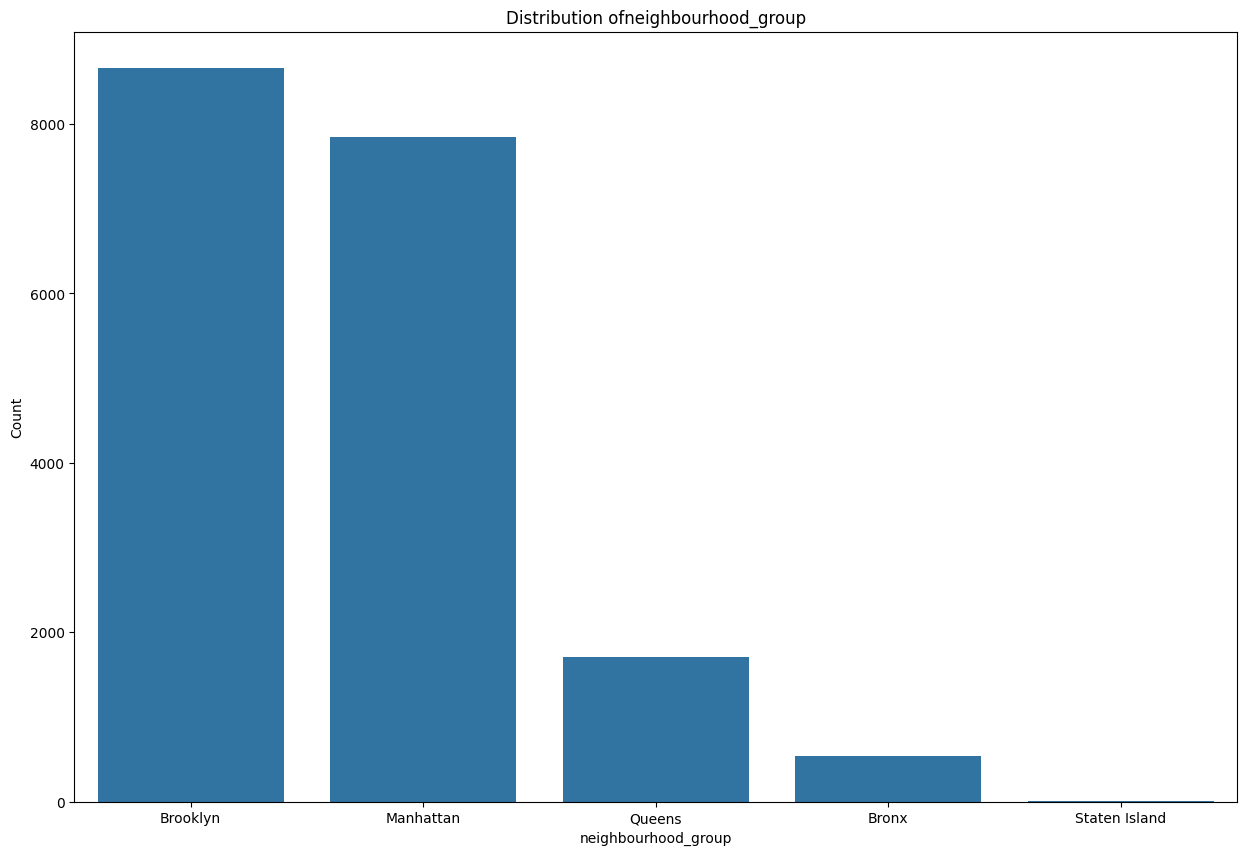

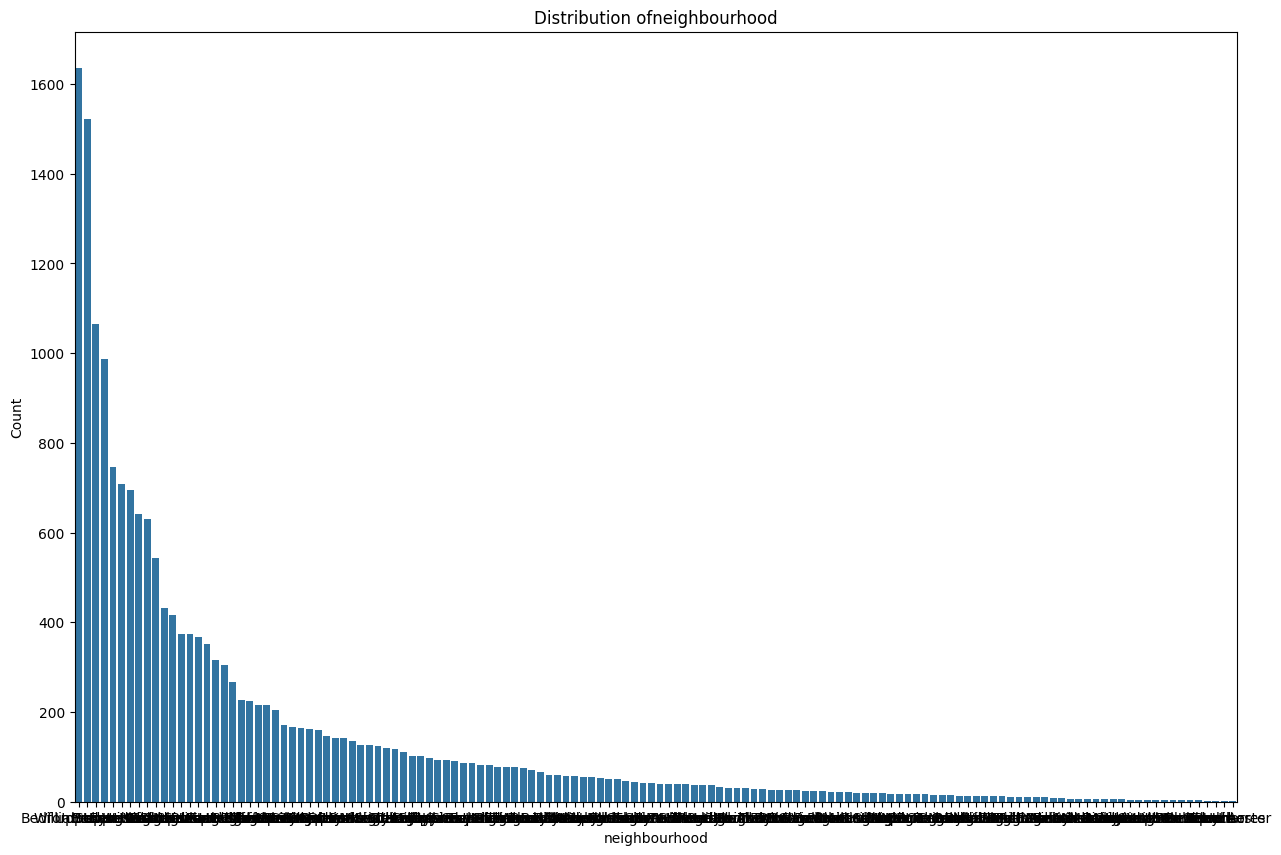

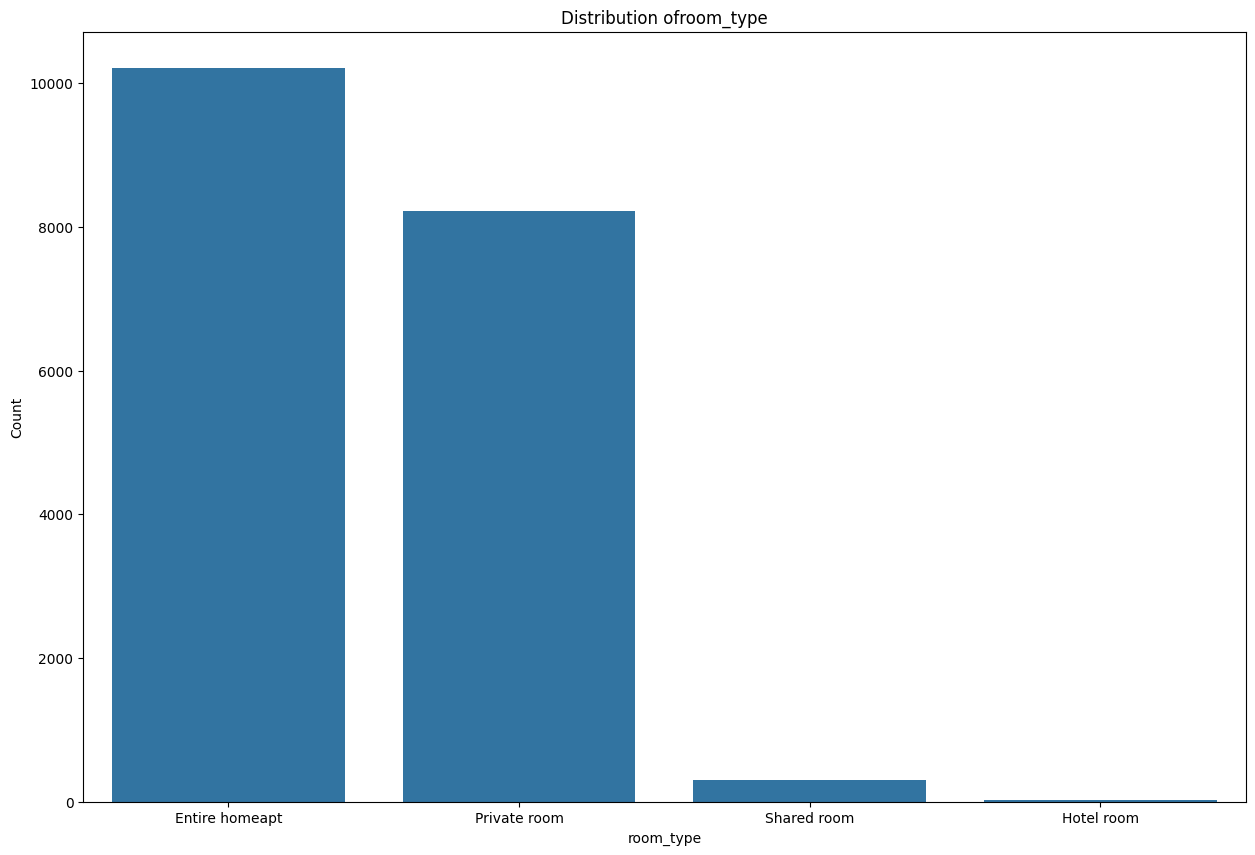

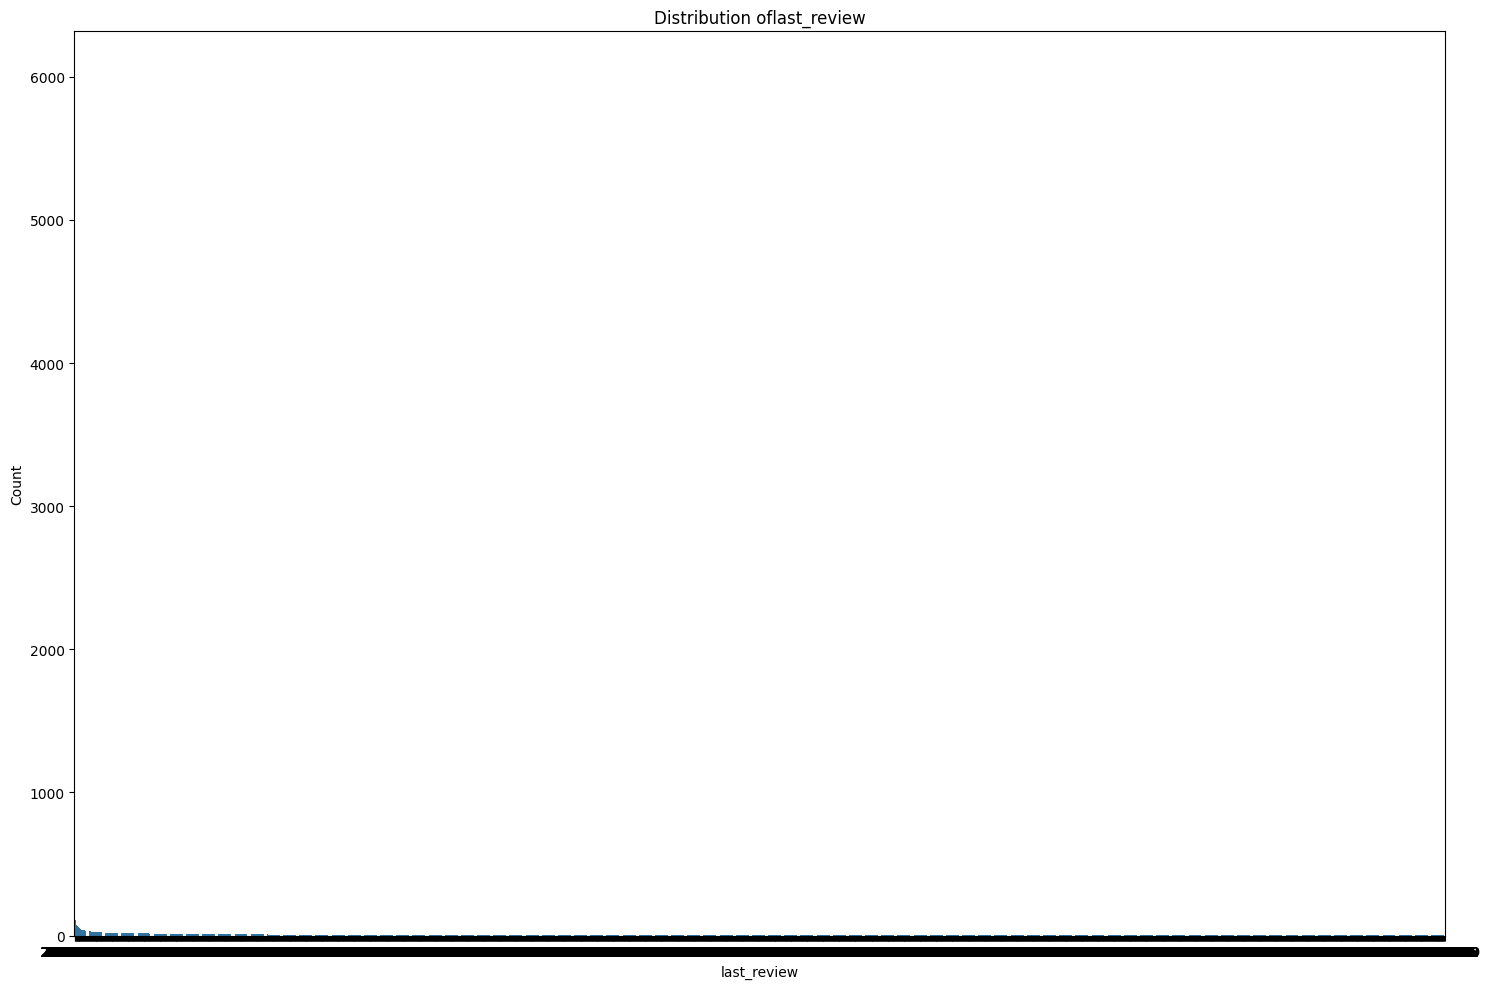

In [71]:
#bar plots for categorical columns 
categorical_cols = data_cleaned_filtered.select_dtypes(include=['object'])

for i, col in enumerate(categorical_cols):
    plt.figure(figsize=(15,10))
    sns.barplot(x=data_cleaned_filtered[col].value_counts().index, y= data_cleaned_filtered[col].value_counts().values)
    plt.title(f'Distribution of{col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()